In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pylab
import numpy.polynomial.polynomial as poly
import numpy as np
from scipy.integrate import odeint
import math
g=9.81
G=6.67408*10**-11
mErde=5.972*10**24
mSonne=1.989*10**30

In [2]:
G

6.674079999999999e-11

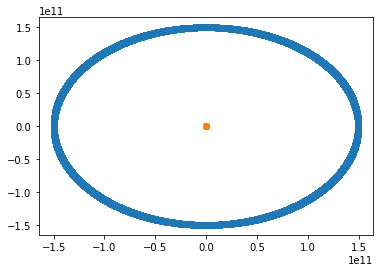

In [3]:
factor = 3600 
yearsTimeSpan = 5
deltaT = 1 * factor

def distance(p1, p2):
    return math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

def direction(p1, p2):
    return [p2[0] - p1[0], p2[1] - p1[1]]

def acceleration(mOwn, pOwn, mOther, pOther):
    intermed = -G * mOther / (distance(pOwn, pOther)**3)
    return [element * intermed for element in direction(pOther, pOwn)]

def calc(vErde, vSonne, pErde, pSonne):
    koordsSonne = [[pSonne[0], pSonne[1], vSonne[0], vSonne[1]]]
    koordsErde  = [[pErde[0], pErde[1], vErde[0], vErde[1]]]

    for x in range(0, int(yearsTimeSpan * 365 * 24 * 3600 / factor)):
        deltaTNeu = deltaT / 2
        pErde = [pErde[0] + deltaTNeu * vErde[0], pErde[1] + deltaTNeu * vErde[1]]
        acc = acceleration(mErde, pErde, mSonne, pSonne)
        vErde = [vErde[0] + deltaT * acc[0], vErde[1] + deltaT * acc[1]] 
        pErde = [pErde[0] + deltaTNeu * vErde[0], pErde[1] + deltaTNeu * vErde[1]]

        pSonne = [pSonne[0] + deltaTNeu * vSonne[0], pSonne[1] + deltaTNeu * vSonne[1]]
        acc = acceleration(mSonne, pSonne, mErde, pErde)
        vSonne = [vSonne[0] + deltaT * acc[0], vSonne[1] + deltaT * acc[1]] 
        pSonne = [pSonne[0] + deltaTNeu * vSonne[0], pSonne[1] + deltaTNeu * vSonne[1]]

        
        koordsErde.append([pErde[0], pErde[1], vErde[0], vErde[1]])
        koordsSonne.append([pSonne[0], pSonne[1], vSonne[0], vSonne[1]])

    return [koordsErde, koordsSonne]
            
def calcAlt(vErde, vSonne, pErde, pSonne):
    koordsSonne = [[pSonne[0], pSonne[1], vSonne[0], vSonne[1]]]
    koordsErde  = [[pErde[0], pErde[1], vErde[0], vErde[1]]]

    for x in range(0, int(yearsTimeSpan * 365 * 24 * 3600 / factor)):
        aErde  = acceleration(mErde, pErde, mSonne, pSonne)
        aSonne = acceleration(mSonne, pSonne, mErde, pErde)

        vErde = [vErde[0] + aErde[0] * deltaT, vErde[1] + aErde[1] * deltaT]
        vSonne = [vSonne[0] + aSonne[0] * deltaT, vSonne[1] + aSonne[1] * deltaT]

        pErde = [pErde[0] + vErde[0] * deltaT, pErde[1] + vErde[1] * deltaT]
        pSonne = [pSonne[0] + vSonne[0] * deltaT, pSonne[1] + vSonne[1] * deltaT]
    
        koordsErde.append([pErde[0], pErde[1], vErde[0], vErde[1]])
        koordsSonne.append([pSonne[0], pSonne[1], vSonne[0], vSonne[1]])
    return [koordsErde, koordsSonne]
    
vErde  = [0.0, 29.8 * 10**3]
vSonne = [0.0, 0.0]
pErde  = [1.4960*(10**11), 0.0]
pSonne = [0.0, 0.0]
data = calc(vErde, vSonne, pErde, pSonne)

plt.scatter([element[0] for element in data[0]], [element[1] for element in data[0]])       
plt.scatter([element[0] for element in data[1]], [element[1] for element in data[1]])      


Wie zu erwarten war, ist zu erkennen, dass die Erde die Sonne umkreist. Die Bahn der Sonne fällt auf einen Punkt zusammen, da sie aufgrund ihrer sehr hohen Masse eine Bahn mit sehr geringen Durchmesser durchläuft. Wird nur die Bahn der Sonne eingezeichnet so erhällt man folgendes:

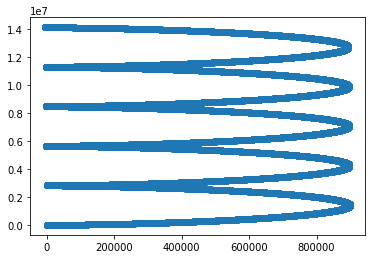

In [4]:
plt.scatter([element[0] for element in data[1]], [element[1] for element in data[1]])      


Dieses Ergebnis ist auf dem ersten Blick sehr überraschend, da eine Ellipsenbahn von uns erwartet wurde. 
Da zum Zeitpunkt t=0 die Sonne ihre Geschwindigkeit v=0 gesetzt wurde, aber die Erde bereits in Bewegung war und alle Impulse in der Summe 0 ergeben müssen, bedeutet das, dass der Schwerpunk des Systems zum Zeitpunkt t=0 in Bewegung sein musste.

Diese Tatsache wurde in obiger Kalkulation nicht berücksichtigt.
Führt man selbige Berechnung mit einer Anfangsgeschwindigkeit für die Sonne durch, so dass ihr Impuls betraglich dem der Erde entspricht, so erhällt man folgendes Ergebnis:

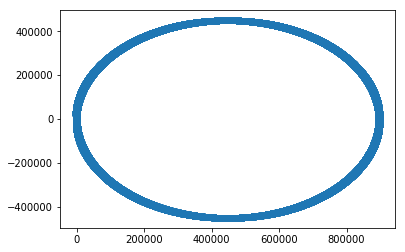

In [5]:
vErde  = [0.0, 29.8 * 10**3]
vSonne = [-mErde / mSonne * vErde[0], -mErde / mSonne * vErde[1]]
pErde  = [1.4960*(10**11), 0.0]
pSonne = [0.0, 0.0]
data = calc(vErde, vSonne, pErde, pSonne)
plt.scatter([element[0] for element in data[1]], [element[1] for element in data[1]])      


Da der Schwerpunk nun ruhend ist, entsteht der zunächst erahnte Effekt, dass die Sonne eine Ellipsenbahn vollzieht.

Um das System nun zu validieren, wird nun der Impuls über alle Messwerte errechnet. Dieser muss für alle Messwerte den gleichen Wert ergeben:

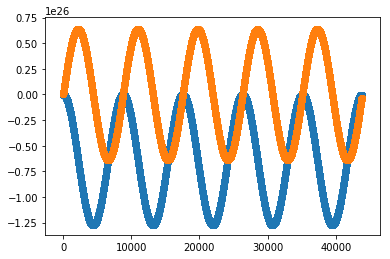

In [6]:
def impuls(masse, geschwindigkeit):
    return masse * geschwindigkeit

sumImpulseX = []
sumImpulseY = []

for index in range(0, len(data[0])):
    sumImpulseX.append(impuls(mErde, data[0][index][2]) + impuls(mSonne, data[1][index][2]))
    sumImpulseY.append(impuls(mErde, data[0][index][3]) + impuls(mSonne, data[1][index][3]))

plt.scatter(range(0, len(data[0])), sumImpulseX)
plt.scatter(range(0, len(data[0])), sumImpulseY)

Da der Impulserhaltungssatz gilt, müssen die einzelnen Messwerte um einen konstanten Wert fluktuieren. Da das Bezugssystem ruhend und keine weiteren Einflüsse neben Sonne und Erde eingegangen sind, ist der konstante Wert 0.
Die Größenordnung des Fehlers erscheint zunächst erschreckend, im Verhälltnis zum letzten errechneten Wert für den Impuls der Sonne zeigt sich jedoch:

In [7]:
[impuls(mSonne, data[1][-1][2]), impuls(mSonne, data[1][-1][3])]

[-9.858194840248786e+27, -1.7769567493221588e+29]

Der letzte errechnete Impuls der Sonne bewegt sich hier bei 1e27 bzw 1e29. Ein Fehler in der Größenordnung von 1e15 ist also vernachlässigbar.

Eine weitere Kontrolle der numerischen Berechnung kann mithilfe des Energieerhaltungssatzes vorgenommen werden. Da weder Energie dem System hinzugefügt noch entfernt wird, muss diese über alle Berechnungen hinweg konstant bleiben. Für eine vollständige Berechnung muss im vorliegenden Fall die chinetische und die potenzielle Energie betrachtet werden.

-2.647554454998686e+33

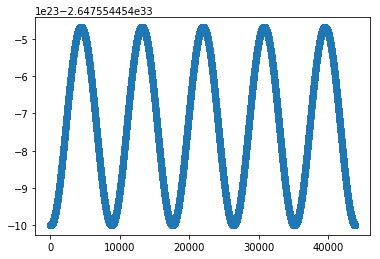

In [8]:
def potEnergie(masse1, masse2, distanz):
    return -G * masse1 * masse2 / distanz

def chinEnergie(masse, geschwindigkeit):
    return 0.5 * masse * geschwindigkeit ** 2

sumEnergie = []
for index in range(0, len(data[0])):
    distanceSonneErde = distance(data[0][index], data[1][index])
    sumEnergie.append(
    chinEnergie(mErde, math.sqrt(data[0][index][2]**2 + data[0][index][3]**2))
    +chinEnergie(mSonne, math.sqrt(data[1][index][2]**2 + data[1][index][3]**2))
    +potEnergie(mSonne, mErde, distanceSonneErde)
    )
plt.scatter(range(0, len(data[0])), sumEnergie)
sumEnergie[-1]


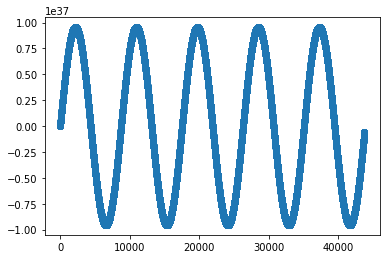

In [9]:
ls = []

for index in range(0, len(data[0])):
    px = impuls(mErde, data[0][index][2]) + impuls(mSonne, data[1][index][2])
    py = impuls(mErde, data[0][index][3]) + impuls(mSonne, data[1][index][3])
    direc = direction(data[0][index], data[1][index])
    l = px*direc[1] - py*direc[0]
    ls.append(l)

plt.scatter(range(0, len(data[0])), ls)

## Aufgabe 4

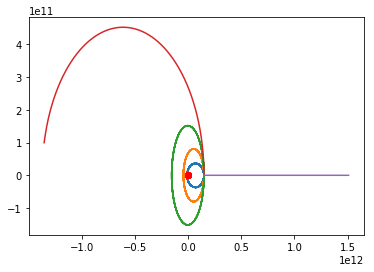

In [20]:
vErde  = [0.0, 10 * 10**3]
vSonne = [0.0, 0.0]
pErde  = [1.4960*(10**11), 0.0]
pSonne = [0.0, 0.0]
data = calc(vErde, vSonne, pErde, pSonne)

plt.plot([element[0] for element in data[0]], [element[1] for element in data[0]], '-')       
plt.plot([element[0] for element in data[1]], [element[1] for element in data[1]], 'ro')    

vErde  = [0.0, 20 * 10**3]
data = calc(vErde, vSonne, pErde, pSonne)
plt.plot([element[0] for element in data[0]], [element[1] for element in data[0]], '-')       

vErde  = [0.0, 30 * 10**3]
data = calc(vErde, vSonne, pErde, pSonne)
plt.plot([element[0] for element in data[0]], [element[1] for element in data[0]], '-')       

vErde  = [0.0, 40 * 10**3]
data = calc(vErde, vSonne, pErde, pSonne)
plt.plot([element[0] for element in data[0]], [element[1] for element in data[0]], '-') 

vErde  = [40 * 10**3, 0.0]
data = calc(vErde, vSonne, pErde, pSonne)
plt.plot([element[0] for element in data[0]], [element[1] for element in data[0]], '-') 